# Basic Demonstration of cEpiabm driven from Python

In [9]:
from epiabm import *
import time
import json

## Initialization

In [10]:
LogFile.Instance().configure(1, "threaded_output/log.log") # Set logger to print warnings and above to console
#LogFile.Instance().set_level(0)

json_cfg = json.load(open("parameters.json", 'r'))
json_cfg["random_seed"] = 2
json_cfg["infection_config"]["host_progression_config"]["use_ages"] = True
json_cfg["infection_config"]["infection_radius"] = 1
json_cfg["timesteps_per_day"] = 1
json.dump(json_cfg, open("parameters_live.json", 'w'))

### Load parameters to a SimulationConfig
cfg = JsonFactory().load_config("parameters_live.json")

### Create a toy population
# Create a population with 100,000 people split between 100 cells. Each cell has 100 microcells and each microcell has 50 households
simulaiton = None
population = None # Remove reference to old population if it exists (for testing, population constructor and destructor print to terminal)
population = ToyPopulationFactory().make_population(100000, 6, 100, 50, 0)
population.initialize()

### Randomly initialize 1 in 10000 people as infected
r = RandomSeedSweep(cfg, 10000)
r.bind_population(population)
r(0)
del r

Created Population


## Configure a Simulation

In [11]:
simulation = ThreadedSimulation(population, None) # Create a simulation acting on the population

# Configure which sweeps to run
simulation.add_sweep(HouseholdSweep(cfg), 0)
simulation.add_sweep(SpatialSweep(cfg), 0)
simulation.add_sweep(NewInfectionSweep(cfg), 1)
simulation.add_sweep(HostProgressionSweep(cfg), 2)

# Configure what data to output
simulation.add_timestep_reporter(
    PopulationCompartmentReporter("threaded_output/population_results.csv"))

# Run Simulation
#simulation.simulate(100)

Deleted Population


In [12]:
simulation.simulate(100)

In [13]:
import pandas as pd
results = pd.read_csv("output/population_results.csv")

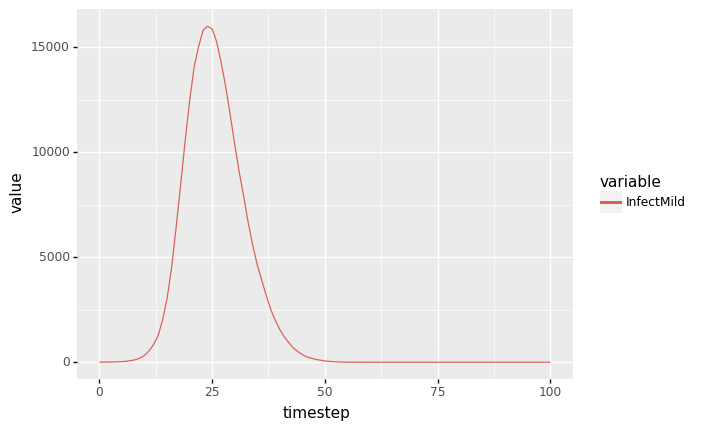

<ggplot: (8745936950077)>

In [14]:
from plotnine import *
(
    ggplot(results[['timestep', 'InfectMild']].melt('timestep'), aes(x='timestep', y='value', colour='variable')) +
    geom_line()
)

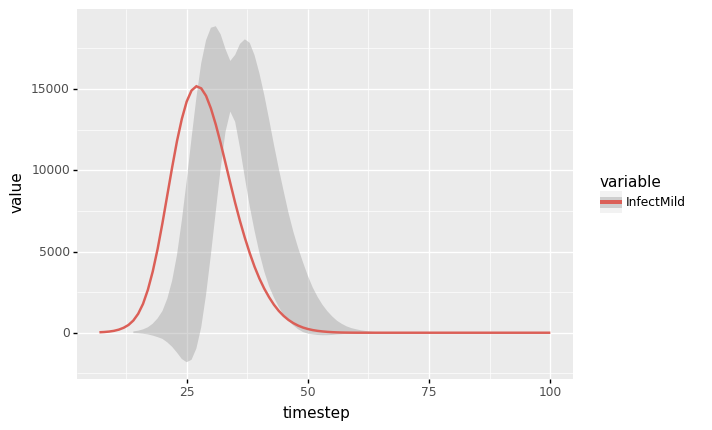

<ggplot: (8746041638521)>

In [15]:
from plotnine import *
(
    ggplot(results[['timestep', 'InfectMild']].melt('timestep'), aes(x='timestep', y='value', colour='variable')) +
    geom_smooth(method='mavg',method_args={'window':7})
)

In [16]:
c = population.cells()[1]
c.location()

(0.25, 0.0)